Сегодня мы будем работать с датасетом цен на тыквы в Бостоне отсюда: https://www.kaggle.com/datasets/usda/a-year-of-pumpkin-prices.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_training_data/boston_9-24-2016_9-30-2017.csv')

Базовые сведения о датасете:

In [ ]:
df.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,200,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,200,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,200,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,200,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,160,180,...,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity Name   352 non-null    object 
 1   City Name        352 non-null    object 
 2   Type             0 non-null      float64
 3   Package          352 non-null    object 
 4   Variety          352 non-null    object 
 5   Sub Variety      28 non-null     object 
 6   Grade            0 non-null      float64
 7   Date             352 non-null    object 
 8   Low Price        352 non-null    int64  
 9   High Price       352 non-null    int64  
 10  Mostly Low       352 non-null    int64  
 11  Mostly High      352 non-null    int64  
 12  Origin           352 non-null    object 
 13  Origin District  66 non-null     object 
 14  Item Size        348 non-null    object 
 15  Color            304 non-null    object 
 16  Environment      0 non-null      float64
 17  Unit of Sale    

Мы будем предсказывать цену по типу и размеру тыквы.

In [ ]:
df = df.dropna(subset=['Variety', 'Item Size', 'Low Price', 'High Price'])

Сделаем среднюю цену из высокой и низкой.

In [ ]:
df[['Low Price', 'High Price']].mean(axis=0)

,0
Low Price,161.910920
High Price,186.586207


In [ ]:
X = df[['Variety', 'Item Size']]
y = df[['Low Price', 'High Price']].mean(axis=1)

In [ ]:
set(X['Variety'])

{'BIG MACK TYPE',
 'BLUE TYPE',
 'CINDERELLA',
 'FAIRYTALE',
 'HOWDEN TYPE',
 'KNUCKLE HEAD',
 'MINIATURE',
 'PIE TYPE'}

In [ ]:
set(X['Item Size'])

{'exjbo', 'jbo', 'lge', 'med', 'med-lge', 'sml', 'xlge'}

In [ ]:
y

,0
0,180.0
1,180.0
2,180.0
3,180.0
4,170.0
...,...
347,16.5
348,16.5
349,16.5
350,16.5


## Подход 1: стандартный

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Напоминание: **стратификация** - это способ разделения на тренировочную и тестовую выборки, при котором соотношение классов на тесте соответствует таковому на трейне.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=X[['Variety', 'Item Size']],
                                                    shuffle=True,
                                                    )

In [ ]:
len(X_train)

278

In [ ]:
enc = OneHotEncoder()
enc.fit(X_train)

X_train_transformed = enc.transform(X_train)
X_test_transformed = enc.transform(X_test)

In [ ]:
X_train_transformed

<278x15 sparse matrix of type '<class 'numpy.float64'>'
	with 556 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_transformed.todense().shape

(278, 15)

In [ ]:
enc.categories_

[array(['BIG MACK TYPE', 'BLUE TYPE', 'CINDERELLA', 'FAIRYTALE',
        'HOWDEN TYPE', 'KNUCKLE HEAD', 'MINIATURE', 'PIE TYPE'],
       dtype=object),
 array(['exjbo', 'jbo', 'lge', 'med', 'med-lge', 'sml', 'xlge'],
       dtype=object)]

In [ ]:
ln = LinearRegression()

In [ ]:
ln.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
preds = ln.predict(X_test_transformed)

In [ ]:
print(r2_score(y_test, preds))
print(mean_squared_error(y_test, preds))
print(mean_absolute_error(y_test, preds))

0.5210530963223207
3340.3807004101227
40.823123974641334


In [ ]:
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
import matplotlib.pyplot as plt

PredictionErrorDisplay - это график, в котором по оси х обозначены предсказанные значения, а по оси у - residuals, т.е. разница между предсказанным значением и настоящим.

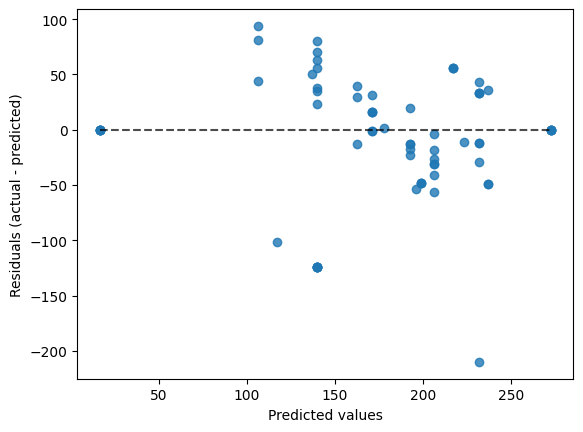

In [ ]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=preds)
display.plot()
plt.show()

PredictionErrorDisplay для идеальной регрессионной модели выглядит так:

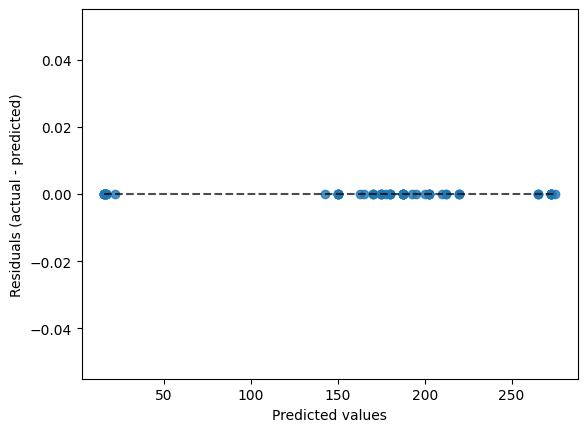

In [ ]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_test)
display.plot()
plt.show()

## Подход 2: кросс-валидация

### cross_validate

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
reg = LinearRegression()

Один из параметров, который принимает на вход функция cross_validate - это словарь, где ключами являются названия метрик, удобные для вас, а значениями - названия этих метрик внутри sklearn. Если вы не знаете, как "достать" нужную вам метрику, обратитесь к функции sklearn.metrics.get_scorer_names().

In [ ]:
scoring = {
           'r2_score': 'r2',
           'MSE': 'neg_mean_squared_error',
           'MAE': 'neg_mean_absolute_error'
           }

Все метрики, которые мы можем выбрать для кросс-валидации, следуют одному и тому же принципу: значение метрики становится больше, когда модель работает лучше. Именно поэтому вместо обычных метрик среднеквадратичной и средней абсолютной ошибки мы берем их обратные версии.

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [ ]:
# без return_estimator эта функция не вернёт обученную модель!
scores = cross_validate(reg,
                        X_train_transformed,
                        y_train,
                        scoring=scoring,
                        cv=5,
                        return_estimator=True,
                        return_train_score=True,
                        )

In [ ]:
scores

{'fit_time': array([0.01106596, 0.00388193, 0.00337458, 0.00361967, 0.00346971]),
 'score_time': array([0.00288129, 0.00210929, 0.0020771 , 0.00230122, 0.00253415]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_r2_score': array([0.61953874, 0.57400834, 0.52232104, 0.62046751, 0.54823029]),
 'train_r2_score': array([0.61108318, 0.62539612, 0.63124617, 0.61286735, 0.63415035]),
 'test_MSE': array([-2642.17424954, -2660.89114855, -3003.85289825, -2388.89364192,
        -3130.54179476]),
 'train_MSE': array([-2520.30517762, -2494.30444041, -2444.99665841, -2573.83638136,
        -2376.40864288]),
 'test_MAE': array([-35.15100878, -35.53540278, -40.95662346, -35.10151034,
        -39.21338017]),
 'train_MAE': array([-35.05830764, -35.07222756, -35.09326413, -35.95625407,
        -35.01507123])}

In [ ]:
scores_df = pd.DataFrame.from_dict(scores)

Обратите внимание, что названия колонок в датафрейме используют те названия метрик, которые являются ключами в словаре scoring.

In [ ]:
scores_df

,fit_time,score_time,estimator,test_r2_score,train_r2_score,test_MSE,train_MSE,test_MAE,train_MAE
0,0.011066,0.002881,LinearRegression(),0.619539,0.611083,-2642.174250,-2520.305178,-35.151009,-35.058308
1,0.003882,0.002109,LinearRegression(),0.574008,0.625396,-2660.891149,-2494.304440,-35.535403,-35.072228
2,0.003375,0.002077,LinearRegression(),0.522321,0.631246,-3003.852898,-2444.996658,-40.956623,-35.093264
3,0.003620,0.002301,LinearRegression(),0.620468,0.612867,-2388.893642,-2573.836381,-35.101510,-35.956254
4,0.003470,0.002534,LinearRegression(),0.548230,0.634150,-3130.541795,-2376.408643,-39.213380,-35.015071


Можно узнать, например, среднее значение r2:

In [ ]:
print("%0.2f test r2 with a standard deviation of %0.2f" % (scores['test_r2_score'].mean(), scores['test_r2_score'].std()))

0.58 test r2 with a standard deviation of 0.04


Чтобы вытащить одну из пяти моделей, нужно обратиться к ней по индексу:

In [ ]:
y_pred_cv_3 = scores['estimator'][3].predict(X_test_transformed)

Теперь мы можем или пользоваться лучшим эстиматором, или заставлять все модели голосовать, или обучиться снова на всех данных (вернуться к подходу 1).

In [ ]:
print(r2_score(y_test, y_pred_cv_3))
print(mean_squared_error(y_test, y_pred_cv_3))
print(mean_absolute_error(y_test, y_pred_cv_3))

0.5079609323587003
3431.691055472181
41.36546453548682


### KFold

Для классификации лучше использовать **StratifiedKFold**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html, который автоматически стратифицирует выборку по зависимой переменной.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
n_splits = 5
cv = KFold(n_splits=n_splits)

KFold возвращает индексы тех рядов, которые сейчас являются тренировочными или тестовыми

In [ ]:
for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

Мы будем пользоваться пайплайном, чтобы не инициализировать на каждом фолде и энкодер, и модель. Пайплайн позволяет объединить этапы предобработки и моделирования, и хранит объекты классов для препроцессинга (например, векторайзеры) и классов моделей в одном месте.

In [ ]:
from sklearn.pipeline import Pipeline

Далее мы итеративно обучаем модель на всех фолдах:

In [ ]:
pipes = []

for i, (train_indexes, test_indexes) in enumerate(cv.split(X_train, y_train)):

    print('Fold number: ', i)

    pipe = Pipeline([('encoder', OneHotEncoder()), ('linreg', LinearRegression())])

    current_X_train = X_train.iloc[train_indexes]
    current_y_train = y_train.iloc[train_indexes]
    current_X_test = X_train.iloc[test_indexes]
    current_y_test = y_train.iloc[test_indexes]

    pipe.fit(current_X_train, current_y_train)
    current_preds = pipe.predict(current_X_test)

    print(r2_score(current_y_test, current_preds))
    print(mean_squared_error(current_y_test, current_preds))
    print(mean_absolute_error(current_y_test, current_preds))

    pipes.append(pipe)

Fold number:  0
0.6195387392473999
2642.1742495356407
35.15100877859516
Fold number:  1
0.5740083415170434
2660.891148552211
35.53540278021826
Fold number:  2
0.5223210425257752
3003.8528982519556
40.95662346193417
Fold number:  3
0.6204675149242979
2388.893641919752
35.10151034181348
Fold number:  4
0.5482302892748538
3130.5417947585133
39.213380168910405


In [ ]:
y_test_pred_skf = pipes[3].predict(X_test)

In [ ]:
print(r2_score(y_test, y_test_pred_skf))
print(mean_squared_error(y_test, y_test_pred_skf))
print(mean_absolute_error(y_test, y_test_pred_skf))

0.5079609323587003
3431.691055472181
41.36546453548682


## Подход 3: подбор гиперпараметров

In [ ]:
# можно заметить, что здесь уже есть кросс-валидация (CV)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Solver - это алгоритм оптимизации, который использует модель. Подробнее обо всех возможных солверах можно прочитать в документации гребневой регрессии: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
param_grid = {'ridge__alpha': np.arange(0.0, 2, 0.4), 'ridge__solver': ['lsqr', 'sparse_cg', 'sag']}

In [ ]:
np.arange(0.0, 2, 0.4)

array([0. , 0.4, 0.8, 1.2, 1.6])

In [ ]:
pipe_gs = Pipeline([('encoder', OneHotEncoder()),
                    ('ridge', Ridge())])

In [ ]:
search = GridSearchCV(pipe_gs, param_grid, n_jobs=2, cv=5, scoring='r2', return_train_score=True, verbose=1)

**Вопрос:** сколько раз будет сделана регрессия (сколько раз пройдет фит)?

In [ ]:
%%time
search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 190 ms, sys: 63.2 ms, total: 253 ms
Wall time: 5.37 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder', OneHotEncoder()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'ridge__alpha': array([0. , 0.4, 0.8, 1.2, 1.6]),
                         'ridge__solver': ['lsqr', 'sparse_cg', 'sag']},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.016679  , 0.01658859, 0.01748977, 0.01592398, 0.01458535,
        0.01438341, 0.0149394 , 0.01741347, 0.01348896, 0.01601863,
        0.01814318, 0.01641107, 0.01770673, 0.01392674, 0.01148729]),
 'std_fit_time': array([0.0061245 , 0.00305091, 0.00379574, 0.00420839, 0.00027498,
        0.00031066, 0.00188302, 0.00321648, 0.00148925, 0.00297525,
        0.0028974 , 0.00641726, 0.00759289, 0.00138865, 0.00375612]),
 'mean_score_time': array([0.00664725, 0.00868883, 0.00772648, 0.00831647, 0.00689673,
        0.01032715, 0.00670867, 0.00536022, 0.00725584, 0.0079875 ,
        0.00821176, 0.008143  , 0.0094512 , 0.00800142, 0.01156416]),
 'std_score_time': array([0.001736  , 0.00415937, 0.00511331, 0.0036525 , 0.00390476,
        0.00398158, 0.00365375, 0.00325251, 0.00438525, 0.00495782,
        0.00359853, 0.00282738, 0.00254235, 0.00354671, 0.00186088]),
 'param_ridge__alpha': masked_array(data=[0.0, 0.0, 0.0, 0.4, 0.4, 0.4, 0.8, 0.8, 0.8,
                   

In [ ]:
gs_results_df = pd.DataFrame(search.cv_results_)

In [ ]:
gs_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,param_ridge__solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016679,0.006124,0.006647,0.001736,0.0,lsqr,"{'ridge__alpha': 0.0, 'ridge__solver': 'lsqr'}",0.619586,0.574019,0.522255,...,0.576906,0.038821,15,0.611083,0.625396,0.631246,0.612867,0.634150,0.622949,0.009410
1,0.016589,0.003051,0.008689,0.004159,0.0,sparse_cg,"{'ridge__alpha': 0.0, 'ridge__solver': 'sparse...",0.619586,0.574019,0.522255,...,0.576910,0.038818,13,0.611083,0.625396,0.631246,0.612867,0.634150,0.622949,0.009410
2,0.017490,0.003796,0.007726,0.005113,0.0,sag,"{'ridge__alpha': 0.0, 'ridge__solver': 'sag'}",0.619586,0.574019,0.522255,...,0.576910,0.038818,13,0.611083,0.625396,0.631246,0.612867,0.634150,0.622949,0.009410
3,0.015924,0.004208,0.008316,0.003652,0.4,lsqr,"{'ridge__alpha': 0.4, 'ridge__solver': 'lsqr'}",0.622234,0.573232,0.522635,...,0.577684,0.039347,9,0.610834,0.625163,0.631073,0.612670,0.633932,0.622735,0.009420
4,0.014585,0.000275,0.006897,0.003905,0.4,sparse_cg,"{'ridge__alpha': 0.4, 'ridge__solver': 'sparse...",0.622234,0.573232,0.522635,...,0.577684,0.039342,7,0.610834,0.625163,0.631073,0.612670,0.633932,0.622735,0.009420
5,0.014383,0.000311,0.010327,0.003982,0.4,sag,"{'ridge__alpha': 0.4, 'ridge__solver': 'sag'}",0.622234,0.573232,0.522635,...,0.577684,0.039342,7,0.610834,0.625163,0.631073,0.612670,0.633932,0.622735,0.009420
6,0.014939,0.001883,0.006709,0.003654,0.8,lsqr,"{'ridge__alpha': 0.8, 'ridge__solver': 'lsqr'}",0.624056,0.571654,0.522971,...,0.577956,0.039719,1,0.610198,0.624603,0.630622,0.612161,0.633376,0.622192,0.009449
7,0.017413,0.003216,0.005360,0.003253,0.8,sparse_cg,"{'ridge__alpha': 0.8, 'ridge__solver': 'sparse...",0.624056,0.571654,0.522978,...,0.577955,0.039715,2,0.610198,0.624603,0.630622,0.612161,0.633376,0.622192,0.009449
8,0.013489,0.001489,0.007256,0.004385,0.8,sag,"{'ridge__alpha': 0.8, 'ridge__solver': 'sag'}",0.624056,0.571654,0.522978,...,0.577955,0.039715,2,0.610198,0.624603,0.630622,0.612161,0.633376,0.622192,0.009449
9,0.016019,0.002975,0.007987,0.004958,1.2,lsqr,"{'ridge__alpha': 1.2000000000000002, 'ridge__s...",0.625254,0.569807,0.523288,...,0.577923,0.039968,4,0.609297,0.623838,0.629967,0.611428,0.632588,0.621424,0.009491


In [ ]:
gs_preds = search.predict(X_test)

In [ ]:
print(r2_score(y_test, gs_preds))
print(mean_squared_error(y_test, gs_preds))
print(mean_absolute_error(y_test, gs_preds))

0.520506428379357
3344.1933966238084
41.50279243316278


Посмотрим на лучшие параметры:

In [ ]:
search.best_params_

{'ridge__alpha': 0.8, 'ridge__solver': 'lsqr'}